<a href="https://colab.research.google.com/github/navgaur/SP-ML-Weather-092023/blob/main/Weather_Predict_ML1_Sep_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rainfall Prediction: Machine Learning Approach**
Authors : Ankit Goswami, M sparsh Mehra, Safal Sharma

Institution: Department of Physics, Dyal Singh College (University of Delhi), Delhi-110003, India

Mentor: Naveen Gaur

Summer Project submitted to Dyal Singh College, September 2023

Report Number: DSC-PHYS-02/2023

---

# **Weather Prediction**
#classification Algorithms used:
1.   Logistic Regression
2.   SVM
3.   SVM(rbf kernel)
4.   KNN
5.   Gaussian Naive Bias
6.   Random Forest


---




# **INDEX**

1.   Libraries Used
     
2.   Data Preprocessing
3.   Logistic Regression
4.   Linear SVM
5.   SVM Kernel
6.   KNN
7.   Gaussian Naive Bias
8.   Random Forest


---




## **Importing the libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn import under_sampling, over_sampling
from imblearn.combine import SMOTEENN
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score
from sklearn.metrics import recall_score, roc_auc_score, f1_score,classification_report,precision_recall_curve, auc


# **Data Preprocessing**

## Analysis

In [ ]:
dataset = pd.read_csv("/content/Weather Data test1.csv")

In [ ]:
print(dataset.head())

              datetime  temp  humidity  pressure         conditions  \
0  2023-06-05T00:00:00  28.0     69.92     1005.0  Partially cloudy   
1  2023-06-05T01:00:00  28.0     65.77     1004.0  Partially cloudy   
2  2023-06-05T02:00:00  26.2     78.03     1002.5  Partially cloudy   
3  2023-06-05T03:00:00  27.0     69.73     1004.0  Partially cloudy   
4  2023-06-05T04:00:00  26.0     73.97     1004.0             Clear   

                  icon  precipitation sts  
0  partly-cloudy-night                  0  
1  partly-cloudy-night                  0  
2  partly-cloudy-night                  0  
3  partly-cloudy-night                  0  
4          clear-night                  0  


In [ ]:
dataset.head()

,datetime,temp,humidity,pressure,conditions,icon,precipitation sts
0,2023-06-05T00:00:00,28.0,69.92,1005.0,Partially cloudy,partly-cloudy-night,0
1,2023-06-05T01:00:00,28.0,65.77,1004.0,Partially cloudy,partly-cloudy-night,0
2,2023-06-05T02:00:00,26.2,78.03,1002.5,Partially cloudy,partly-cloudy-night,0
3,2023-06-05T03:00:00,27.0,69.73,1004.0,Partially cloudy,partly-cloudy-night,0
4,2023-06-05T04:00:00,26.0,73.97,1004.0,Clear,clear-night,0


check for null values

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           744 non-null    object 
 1   temp               744 non-null    float64
 2   humidity           744 non-null    float64
 3   pressure           744 non-null    float64
 4   conditions         744 non-null    object 
 5   icon               744 non-null    object 
 6   precipitation sts  744 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 40.8+ KB


In [ ]:
dataset.isnull().sum()

datetime             0
temp                 0
humidity             0
pressure             0
conditions           0
icon                 0
precipitation sts    0
dtype: int64

no feature have any null values

In [ ]:
dataset.duplicated().sum()

0

There are no duplicates in the dataset.

Other insights from dataset.

In [ ]:
dataset.describe()

,temp,humidity,pressure,precipitation sts
count,744.000000,744.000000,744.000000,744.000000
mean,31.625134,64.991788,1000.887769,0.059140
std,3.725638,22.240180,2.107328,0.236045
min,24.000000,18.510000,993.900000,0.000000
25%,29.000000,46.440000,999.300000,0.000000
50%,31.000000,66.780000,1001.000000,0.000000
75%,34.000000,84.000000,1002.000000,0.000000
max,41.200000,100.000000,1007.000000,1.000000


Features distribution Histograms

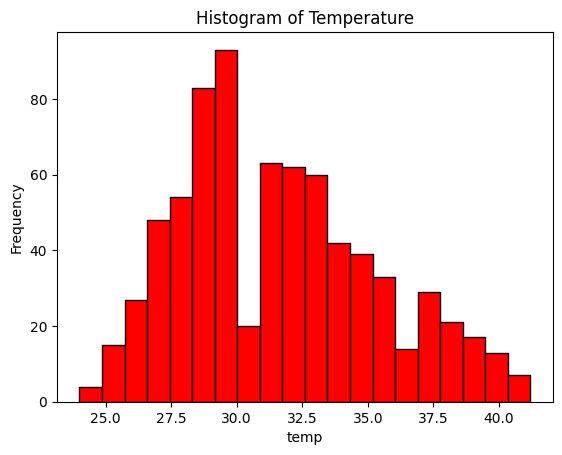

In [ ]:
feature="temp"
plt.hist(dataset[feature], bins=20, color='red', edgecolor='black')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.title(f'Histogram of Temperature')
plt.show()

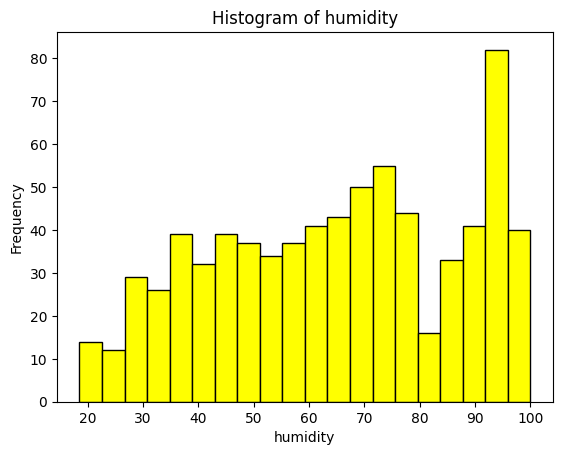

In [ ]:
feature="humidity"
plt.hist(dataset[feature], bins=20, color='yellow', edgecolor='black')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.title(f'Histogram of humidity')
plt.show()

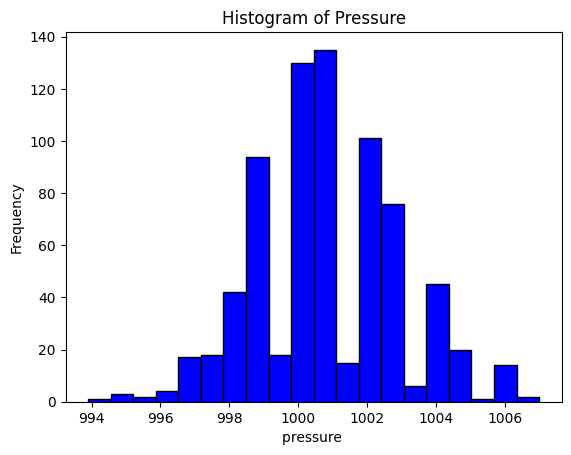

In [ ]:
feature="pressure "
plt.hist(dataset[feature], bins=20, color='blue', edgecolor='black')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.title(f'Histogram of Pressure')
plt.show()

In [ ]:
dataset['precipitation sts'].value_counts()

0    700
1     44
Name: precipitation sts, dtype: int64

CONCLUSION: The dataset is highly imbalanced.

In [ ]:
X = dataset.iloc[:, 1:4].values  ##featuures column
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 0)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[-1.24866684  1.23710781  0.77749738]
 [-0.2883608  -1.27418292  0.25131391]
 [-0.71516348  1.07979004  1.97336891]
 ...
 [-1.46206818  1.42116514 -0.99239248]
 [-0.71516348  1.07979004  1.01667169]
 [ 0.88534657 -0.37796187  0.53832308]]


In [ ]:
print(X_test)


[[ 1.15209825 -0.36726604  0.05997446]
 [-0.98191516  1.07622476  1.4950203 ]
 [ 1.47220026 -1.2019861   0.72966252]
 [-1.24866684 -0.30710202  2.45171752]
 [ 1.41884992 -1.59639467  0.05997446]
 [-0.18166013 -1.19530121  2.45171752]
 [-0.18166013 -0.10076172  0.05997446]
 [-0.98191516 -0.74295692  1.4950203 ]
 [ 0.35184322  0.08953485 -0.41837415]
 [-2.04892186  0.60560843  1.4950203 ]
 [ 1.15209825 -1.34058617  0.05997446]
 [-1.24866684  1.3150982  -0.41837415]
 [ 1.15209825 -0.78128363 -0.41837415]
 [-0.18166013 -0.42074517 -0.41837415]
 [ 1.41884992 -1.67661336  1.01667169]
 [-0.44841181  0.857406   -1.37507137]
 [-1.24866684  1.3150982   1.01667169]
 [ 0.08509154  0.45408424  0.05997446]
 [ 0.32516805  0.02803385 -1.99692456]
 [ 2.05905394 -1.44264218 -2.47527318]
 [-0.10163463  0.26601597 -1.27940165]
 [-0.44841181  0.857406   -1.37507137]
 [-0.71516348  0.23838509  0.05997446]
 [-1.24866684  0.8431449  -0.41837415]
 [-1.24866684  1.3150982  -0.41837415]
 [ 1.44552509 -0.85882836

## Oversampling the training dataset


ROS

In [ ]:
from imblearn.over_sampling import RandomOverSampler as ros
r=ros(sampling_strategy='auto',random_state=0)
X_train1,y_train1=r.fit_resample(X_train,y_train)
print(Counter(y_train1).items(),y_train1.shape)

dict_items([(0, 557), (1, 557)]) (1114,)


SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=0)
X_train2,y_train2=smote.fit_resample(X_train,y_train)
print(Counter(y_train2).items(),y_train2.shape)

dict_items([(0, 557), (1, 557)]) (1114,)


ADASYN

In [ ]:
from imblearn.over_sampling import ADASYN
ad=ADASYN(random_state=0)
X_train3,y_train3=ad.fit_resample(X_train,y_train)
print(Counter(y_train3).items(),y_train3.shape)

dict_items([(0, 557), (1, 569)]) (1126,)


SMOTEENN (Hybrid sampling)

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

# applying combination of SMOTE and RandomUnderSampler
hyb=SMOTEENN(sampling_strategy='auto', random_state=0)
X_train4, y_train4 = hyb.fit_resample(X_train, y_train)

## Oversampling Visualized

### without oversampling

In [ ]:
import plotly.graph_objects as go

# Convert the lists to numpy arrays for easier manipulation
X = np.array(X_train)
Y = np.array(y_train)

# Separate the features for plotting
x_data = X[:, 0]
y_data = X[:, 1]
z_data = X[:, 2]

# Create a 3D scatter plot
fig = go.Figure()

# Plot the data points with different colors based on the labels
fig.add_trace(go.Scatter3d(x=x_data[Y == 0], y=y_data[Y == 0], z=z_data[Y == 0], mode='markers',marker=dict(color='red', size=5), name='no rain'))
fig.add_trace(go.Scatter3d(x=x_data[Y == 1], y=y_data[Y == 1], z=z_data[Y == 1], mode='markers',marker=dict(color='blue', size=5), name='rain'))

# Set labels for the axes
fig.update_layout(scene=dict(xaxis_title='Temperature', yaxis_title='Humidity', zaxis_title='Pressure'))

# Set a title for the plot
fig.update_layout(title='rain no rain classification based on original dataset')
fig.update_layout(width=800, height=800)
# Show the plot
fig.show()

### Using ROS oversampling

In [ ]:
#ROS

import plotly.graph_objects as go

# Convert the lists to numpy arrays for easier manipulation
X = np.array(X_train1)
Y = np.array(y_train1)

# Separate the features for plotting
x_data = X[:, 0]
y_data = X[:, 1]
z_data = X[:, 2]

# Create a 3D scatter plot
fig = go.Figure()

# Plot the data points with different colors based on the labels
fig.add_trace(go.Scatter3d(x=x_data[Y == 0], y=y_data[Y == 0], z=z_data[Y == 0], mode='markers',marker=dict(color='red', size=5), name='no rain'))
fig.add_trace(go.Scatter3d(x=x_data[Y == 1], y=y_data[Y == 1], z=z_data[Y == 1], mode='markers',marker=dict(color='blue', size=5), name='rain'))

# Set labels for the axes
fig.update_layout(scene=dict(xaxis_title='Temperature', yaxis_title='Humidity', zaxis_title='Pressure'))

# Set a title for the plot
fig.update_layout(title='rain no rain classification based on ROS')
fig.update_layout(width=800, height=800)
# Show the plot

fig.show()

dict_items([(0, 557), (1, 557)]) (1114,)


### Using SMOTE

In [ ]:
import plotly.graph_objects as go

# Convert the lists to numpy arrays for easier manipulation
X = np.array(X_train2)
Y = np.array(y_train2)

# Separate the features for plotting
x_data = X[:, 0]
y_data = X[:, 1]
z_data = X[:, 2]

# Create a 3D scatter plot
fig = go.Figure()

# Plot the data points with different colors based on the labels
fig.add_trace(go.Scatter3d(x=x_data[Y == 0], y=y_data[Y == 0], z=z_data[Y == 0], mode='markers',marker=dict(color='red', size=5), name='no rain'))
fig.add_trace(go.Scatter3d(x=x_data[Y == 1], y=y_data[Y == 1], z=z_data[Y == 1], mode='markers',marker=dict(color='blue', size=5), name='rain'))

# Set labels for the axes
fig.update_layout(scene=dict(xaxis_title='Temperature', yaxis_title='Humidity', zaxis_title='Pressure'))

# Set a title for the plot
fig.update_layout(title='rain no rain classification based SMOTE')
fig.update_layout(width=800, height=800)
# Show the plot
fig.show()

### Using ADASYN

In [ ]:
import plotly.graph_objects as go

# Convert the lists to numpy arrays for easier manipulation
X = np.array(X_train3)
Y = np.array(y_train3)

# Separate the features for plotting
x_data = X[:, 0]
y_data = X[:, 1]
z_data = X[:, 2]

# Create a 3D scatter plot
fig = go.Figure()

# Plot the data points with different colors based on the labels
fig.add_trace(go.Scatter3d(x=x_data[Y == 0], y=y_data[Y == 0], z=z_data[Y == 0], mode='markers',marker=dict(color='red', size=5), name='no rain'))
fig.add_trace(go.Scatter3d(x=x_data[Y == 1], y=y_data[Y == 1], z=z_data[Y == 1], mode='markers',marker=dict(color='blue', size=5), name='rain'))

# Set labels for the axes
fig.update_layout(scene=dict(xaxis_title='Temperature', yaxis_title='Humidity', zaxis_title='Pressure'))

# Set a title for the plot
fig.update_layout(title='rain no rain classification based on ADASYN')
fig.update_layout(width=800, height=800)
# Show the plot
fig.show()

### Using  SMOTEEN

In [ ]:
import plotly.graph_objects as go

# Convert the lists to numpy arrays for easier manipulation
X = np.array(X_train4)
Y = np.array(y_train4)

# Separate the features for plotting
x_data = X[:, 0]
y_data = X[:, 1]
z_data = X[:, 2]

# Create a 3D scatter plot
fig = go.Figure()

# Plot the data points with different colors based on the labels
fig.add_trace(go.Scatter3d(x=x_data[Y == 0], y=y_data[Y == 0], z=z_data[Y == 0], mode='markers',marker=dict(color='red', size=5), name='no rain'))
fig.add_trace(go.Scatter3d(x=x_data[Y == 1], y=y_data[Y == 1], z=z_data[Y == 1], mode='markers',marker=dict(color='blue', size=5), name='rain'))

# Set labels for the axes
fig.update_layout(scene=dict(xaxis_title='Temperature', yaxis_title='Humidity', zaxis_title='Pressure'))

# Set a title for the plot
fig.update_layout(title='rain no rain classification based on SMOTEEN')
fig.update_layout(width=800, height=800)
# Show the plot
fig.show()

# **1 Logistic Regression**

## Using ROS dataset

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(class_weight='balanced')

#ROS
classifier.fit(X_train1, y_train1)
#Prediction ROS
y_pred1= classifier.predict(X_test)
#confusion matrix
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)
print("Acurracy ",accuracy_score(y_test, y_pred1)*100)


[[94 49]
 [ 0  6]]
Acurracy  67.11409395973155


In [ ]:
auc_score = roc_auc_score(y_test,y_pred1)
print("AUC Score:", auc_score)

AUC Score: 0.8286713286713286


In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.66      0.79       143
           1       0.11      1.00      0.20         6

    accuracy                           0.67       149
   macro avg       0.55      0.83      0.49       149
weighted avg       0.96      0.67      0.77       149



<Axes: >

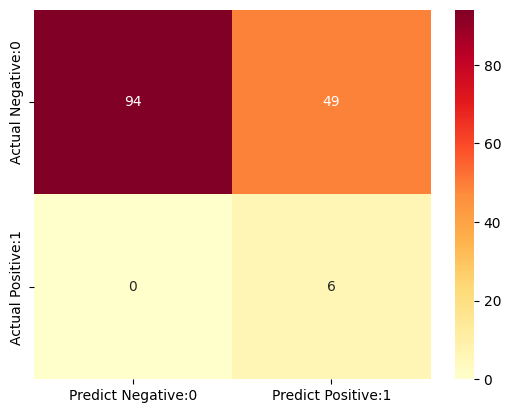

In [ ]:
cm1_matrix = pd.DataFrame(data=cm1, index=['Actual Negative:0','Actual Positive:1']
                          ,columns=['Predict Negative:0','Predict Positive:1'])
sns.heatmap(cm1_matrix, annot=True, fmt='d', cmap='YlOrRd')

## Using SMOTE

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(class_weight='balanced')

#SMOTE
classifier.fit(X_train2, y_train2)
#Prediction SMOTE
y_pred2= classifier.predict(X_test)
#confusion matrix
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)
print("Acurracy ",accuracy_score(y_test, y_pred2)*100)

[[96 47]
 [ 0  6]]
Acurracy  68.45637583892618


In [ ]:
auc_score = roc_auc_score(y_test,y_pred2)
print("AUC Score:", auc_score)

AUC Score: 0.8356643356643356


In [ ]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80       143
           1       0.11      1.00      0.20         6

    accuracy                           0.68       149
   macro avg       0.56      0.84      0.50       149
weighted avg       0.96      0.68      0.78       149



<Axes: >

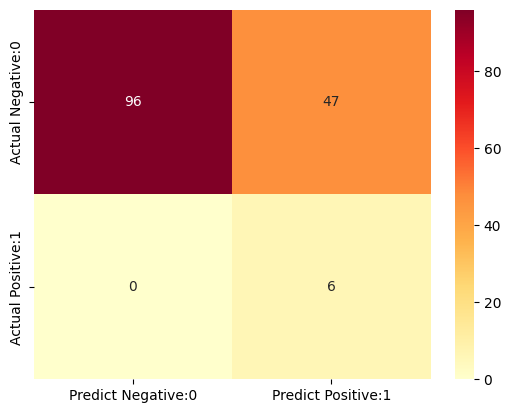

In [ ]:
cm2_matrix = pd.DataFrame(data=cm2, index=['Actual Negative:0','Actual Positive:1']
                          ,columns=['Predict Negative:0','Predict Positive:1'])
sns.heatmap(cm2_matrix, annot=True, fmt='d', cmap='YlOrRd')

## Using ADASYN

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(class_weight='balanced')

#ADASYN
classifier.fit(X_train3, y_train3)
#Prediction ADASYN
y_pred3= classifier.predict(X_test)
#confusion matrix
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)
print("Acurracy ",accuracy_score(y_test, y_pred3)*100)

[[94 49]
 [ 0  6]]
Acurracy  67.11409395973155


In [ ]:
auc_score = roc_auc_score(y_test,y_pred3)
print("AUC Score:", auc_score)

AUC Score: 0.8286713286713286


In [ ]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       1.00      0.66      0.79       143
           1       0.11      1.00      0.20         6

    accuracy                           0.67       149
   macro avg       0.55      0.83      0.49       149
weighted avg       0.96      0.67      0.77       149



<Axes: >

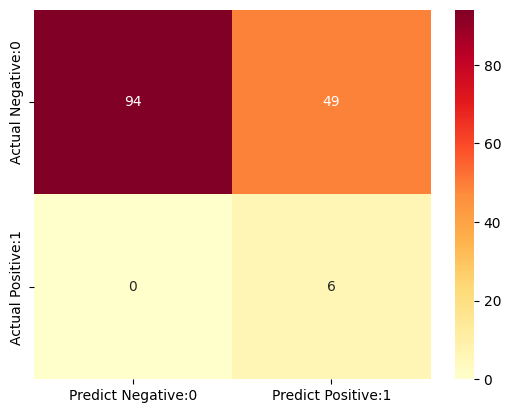

In [ ]:
cm3_matrix = pd.DataFrame(data=cm3, index=['Actual Negative:0','Actual Positive:1']
                          ,columns=['Predict Negative:0','Predict Positive:1'])

sns.heatmap(cm3_matrix, annot=True, fmt='d', cmap='YlOrRd')

## Using SMOTEENN

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(class_weight='balanced')

#SMOTEENN
classifier.fit(X_train4, y_train4)
#Prediction SMOTEENN
y_pred4= classifier.predict(X_test)
#confusion matrix
cm4 = confusion_matrix(y_test, y_pred4)
print(cm4)
print("Acurracy ",accuracy_score(y_test, y_pred4)*100)

[[92 51]
 [ 0  6]]
Acurracy  65.77181208053692


In [ ]:
auc_score = roc_auc_score(y_test,y_pred4)
print("AUC Score:", auc_score)

AUC Score: 0.8216783216783217


In [ ]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       1.00      0.64      0.78       143
           1       0.11      1.00      0.19         6

    accuracy                           0.66       149
   macro avg       0.55      0.82      0.49       149
weighted avg       0.96      0.66      0.76       149



<Axes: >

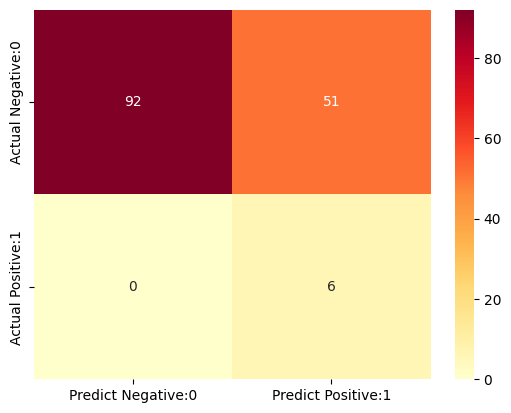

In [ ]:
cm4_matrix = pd.DataFrame(data=cm4, index=['Actual Negative:0','Actual Positive:1']
                          ,columns=['Predict Negative:0','Predict Positive:1'])
sns.heatmap(cm4_matrix, annot=True, fmt='d', cmap='YlOrRd')


#  **2 Linear SVM**

## With ROS Dataset

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
classifier = SVC(kernel = 'linear', random_state = 0)
#lsc-->linear svm classifier

#ROS
classifier.fit(X_train1, y_train1)
#Prediction ROS
y_pred1= classifier.predict(X_test)
#confusion matrix
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)
print("Acurracy ",accuracy_score(y_test, y_pred1)*100)

[[94 49]
 [ 0  6]]
Acurracy  67.11409395973155


In [ ]:
auc_score = roc_auc_score(y_test,y_pred1)
print("AUC Score:", auc_score)

AUC Score: 0.8286713286713286


In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.66      0.79       143
           1       0.11      1.00      0.20         6

    accuracy                           0.67       149
   macro avg       0.55      0.83      0.49       149
weighted avg       0.96      0.67      0.77       149



<Axes: >

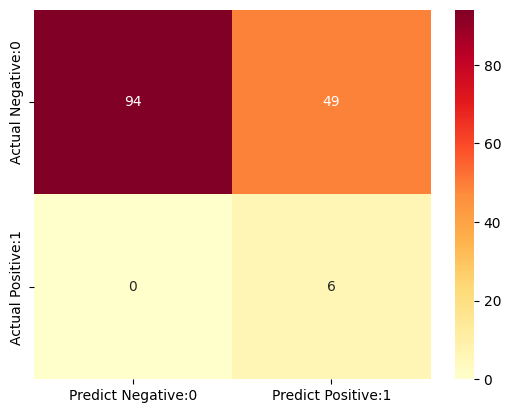

In [ ]:
cm1_matrix = pd.DataFrame(data=cm1, index=['Actual Negative:0','Actual Positive:1']
                          ,columns=['Predict Negative:0','Predict Positive:1'])
sns.heatmap(cm1_matrix, annot=True, fmt='d', cmap='YlOrRd')

## With SMOTE Dataset

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
classifier = SVC(kernel = 'linear', random_state = 0)
#lsc-->linear svm classifier

#SMOTE
classifier.fit(X_train2, y_train2)
#Prediction SMOTE
y_pred2= classifier.predict(X_test)
#confusion matrix SMOTE
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)

print("Acurracy ",accuracy_score(y_test, y_pred2)*100)

[[95 48]
 [ 0  6]]
Acurracy  67.78523489932886


In [ ]:
auc_score = roc_auc_score(y_test,y_pred2)
print("AUC Score:", auc_score)

AUC Score: 0.8321678321678322


In [ ]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.66      0.80       143
           1       0.11      1.00      0.20         6

    accuracy                           0.68       149
   macro avg       0.56      0.83      0.50       149
weighted avg       0.96      0.68      0.77       149



<Axes: >

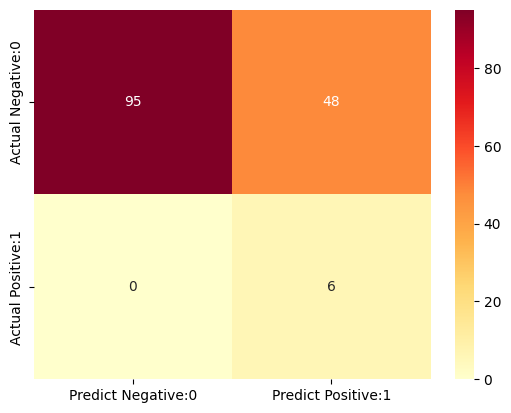

In [ ]:
cm2_matrix = pd.DataFrame(data=cm2, index=['Actual Negative:0','Actual Positive:1']
                          ,columns=['Predict Negative:0','Predict Positive:1'])
sns.heatmap(cm2_matrix, annot=True, fmt='d', cmap='YlOrRd')

## Using ADASYN Dataset

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
classifier = SVC(kernel = 'linear', random_state = 0)
#lsc-->linear svm classifier

#ADASYN
classifier.fit(X_train3, y_train3)
#Prediction ADASYN
y_pred3= classifier.predict(X_test)
#confusion matrix
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)
print("Acurracy ",accuracy_score(y_test, y_pred3)*100)

[[94 49]
 [ 0  6]]
Acurracy  67.11409395973155


In [ ]:
auc_score = roc_auc_score(y_test,y_pred3)
print("AUC Score:", auc_score)

AUC Score: 0.8286713286713286


In [ ]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       1.00      0.66      0.79       143
           1       0.11      1.00      0.20         6

    accuracy                           0.67       149
   macro avg       0.55      0.83      0.49       149
weighted avg       0.96      0.67      0.77       149



<Axes: >

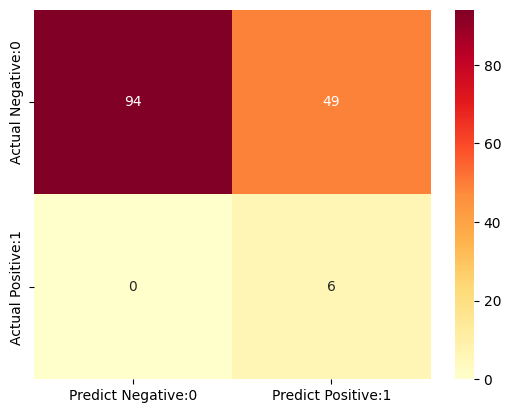

In [ ]:
cm3_matrix = pd.DataFrame(data=cm3, index=['Actual Negative:0','Actual Positive:1']
                          ,columns=['Predict Negative:0','Predict Positive:1'])

sns.heatmap(cm3_matrix, annot=True, fmt='d', cmap='YlOrRd')

## Using SMOTEENN

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
classifier = SVC(kernel = 'linear', random_state = 0)
#lsc-->linear svm classifier
#SMOTEENN
classifier.fit(X_train4, y_train4)
#Prediction SMOTEENN
y_pred4= classifier.predict(X_test)
#confusion matrix
cm4 = confusion_matrix(y_test, y_pred4)
print(cm4)
print("Acurracy ",accuracy_score(y_test, y_pred4)*100)

[[93 50]
 [ 0  6]]
Acurracy  66.44295302013423


In [ ]:
auc_score = roc_auc_score(y_test,y_pred4)
print("AUC Score:", auc_score)

AUC Score: 0.8251748251748252


In [ ]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       1.00      0.65      0.79       143
           1       0.11      1.00      0.19         6

    accuracy                           0.66       149
   macro avg       0.55      0.83      0.49       149
weighted avg       0.96      0.66      0.76       149



<Axes: >

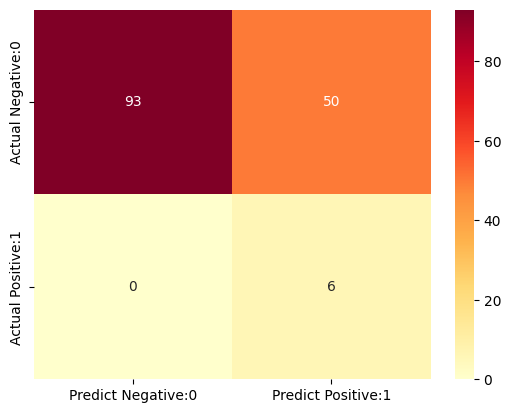

In [ ]:
cm4_matrix = pd.DataFrame(data=cm4, index=['Actual Negative:0','Actual Positive:1']
                          ,columns=['Predict Negative:0','Predict Positive:1'])
sns.heatmap(cm4_matrix, annot=True, fmt='d', cmap='YlOrRd')

# **3 SVM Kernel**

## Using ROS

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
classifier = SVC(kernel = 'rbf', random_state = 0)

#ROS
classifier.fit(X_train1, y_train1)
#Prediction ROS
y_pred1= classifier.predict(X_test)
#confusion matrix
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)
print("Acurracy ",accuracy_score(y_test, y_pred1)*100)

[[95 48]
 [ 0  6]]
Acurracy  67.78523489932886


In [ ]:
auc_score = roc_auc_score(y_test,y_pred1)
print("AUC Score:", auc_score)

AUC Score: 0.8321678321678322


In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.66      0.80       143
           1       0.11      1.00      0.20         6

    accuracy                           0.68       149
   macro avg       0.56      0.83      0.50       149
weighted avg       0.96      0.68      0.77       149



<Axes: >

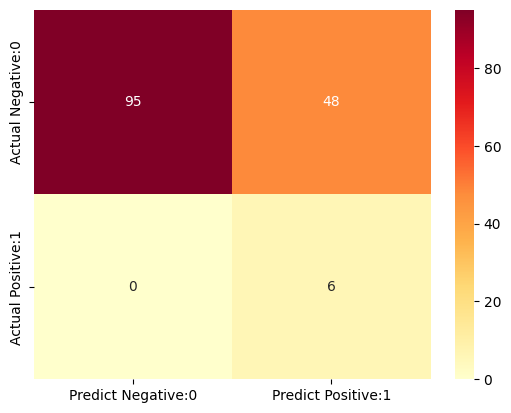

In [ ]:
cm1_matrix = pd.DataFrame(data=cm1,index=['Actual Negative:0','Actual Positive:1'],
                          columns=['Predict Negative:0','Predict Positive:1'] )
sns.heatmap(cm1_matrix, annot=True, fmt='', cmap='YlOrRd')

## Using SMOTE

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
classifier = SVC(kernel = 'rbf', random_state = 0)

#SMOTE
classifier.fit(X_train2, y_train2)
#Prediction SMOTE
y_pred2= classifier.predict(X_test)
#confusion matrix
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)
print("Acurracy ",accuracy_score(y_test, y_pred2)*100)

[[99 44]
 [ 0  6]]
Acurracy  70.46979865771812


In [ ]:
auc_score = roc_auc_score(y_test,y_pred2)
print("AUC Score:", auc_score)

AUC Score: 0.8461538461538461


In [ ]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.69      0.82       143
           1       0.12      1.00      0.21         6

    accuracy                           0.70       149
   macro avg       0.56      0.85      0.52       149
weighted avg       0.96      0.70      0.79       149



<Axes: >

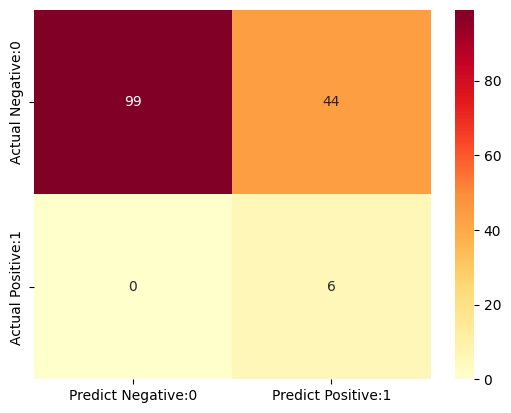

In [ ]:
cm2_matrix = pd.DataFrame(data=cm2, index=['Actual Negative:0','Actual Positive:1']
                          ,columns=['Predict Negative:0','Predict Positive:1'])

sns.heatmap(cm2_matrix, annot=True, fmt='d', cmap='YlOrRd')

## Using ADASYN

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
classifier = SVC(kernel = 'rbf', random_state = 0)

#ADASYN
classifier.fit(X_train3, y_train3)
#Prediction ADASYN
y_pred3= classifier.predict(X_test)
#confusion matrix
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)
print("Acurracy ",accuracy_score(y_test, y_pred3)*100)

[[97 46]
 [ 0  6]]
Acurracy  69.12751677852349


In [ ]:
auc_score = roc_auc_score(y_test,y_pred3)
print("AUC Score:", auc_score)

AUC Score: 0.8391608391608392


In [ ]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       1.00      0.68      0.81       143
           1       0.12      1.00      0.21         6

    accuracy                           0.69       149
   macro avg       0.56      0.84      0.51       149
weighted avg       0.96      0.69      0.78       149



<Axes: >

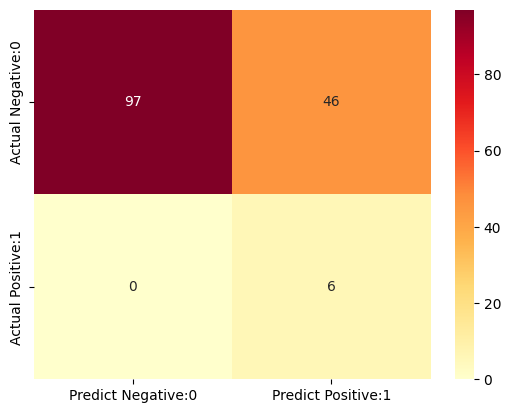

In [ ]:
cm3_matrix = pd.DataFrame(data=cm3, index=['Actual Negative:0','Actual Positive:1']
                          ,columns=['Predict Negative:0','Predict Positive:1'])
sns.heatmap(cm3_matrix, annot=True, fmt='d', cmap='YlOrRd')

## Using SMOTEENN

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
classifier = SVC(kernel = 'rbf', random_state = 0)
#SMOTEENN
classifier.fit(X_train4, y_train4)
#Prediction SMOTEENN
y_pred4= classifier.predict(X_test)
#confusion matrix
cm4 = confusion_matrix(y_test, y_pred4)
print(cm4)
print("Acurracy ",accuracy_score(y_test, y_pred4)*100)

[[91 52]
 [ 0  6]]
Acurracy  65.1006711409396


In [ ]:
auc_score = roc_auc_score(y_test,y_pred4)
print("AUC Score:", auc_score)

AUC Score: 0.8181818181818181


In [ ]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       1.00      0.64      0.78       143
           1       0.10      1.00      0.19         6

    accuracy                           0.65       149
   macro avg       0.55      0.82      0.48       149
weighted avg       0.96      0.65      0.75       149



<Axes: >

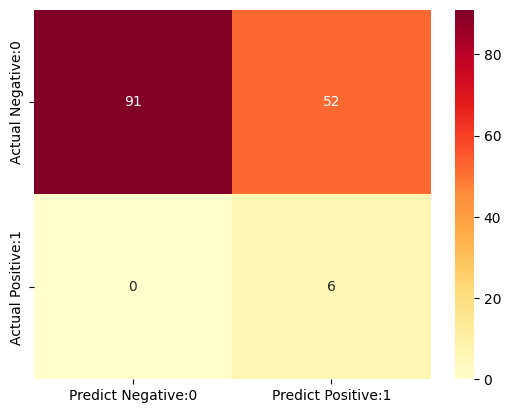

In [ ]:
cm4_matrix = pd.DataFrame(data=cm4, index=['Actual Negative:0','Actual Positive:1']
                          ,columns=['Predict Negative:0','Predict Positive:1'])
sns.heatmap(cm4_matrix, annot=True, fmt='d', cmap='YlOrRd')

# **4 KNN**

## Using ROS

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)

#ROS
classifier.fit(X_train1, y_train1)
#Prediction ROS
y_pred1= classifier.predict(X_test)
#confusion matrix
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)
print("Acurracy ",accuracy_score(y_test, y_pred1)*100)

[[124  19]
 [  3   3]]
Acurracy  85.23489932885906


In [ ]:
auc_score = roc_auc_score(y_test,y_pred1)
print("AUC Score:", auc_score)

AUC Score: 0.6835664335664335


In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       143
           1       0.14      0.50      0.21         6

    accuracy                           0.85       149
   macro avg       0.56      0.68      0.57       149
weighted avg       0.94      0.85      0.89       149



<Axes: >

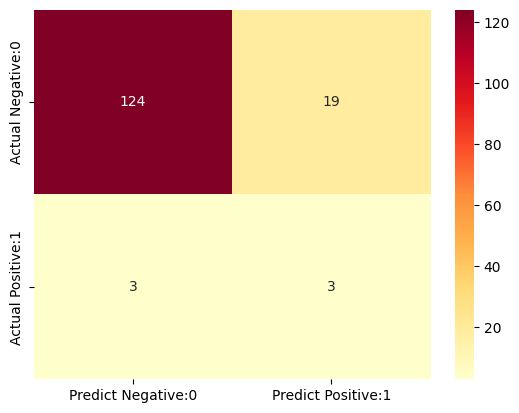

In [ ]:
cm1_matrix = pd.DataFrame(data=cm1, index=['Actual Negative:0','Actual Positive:1']
                          ,columns=['Predict Negative:0','Predict Positive:1'])
sns.heatmap(cm1_matrix, annot=True, fmt='d', cmap='YlOrRd')

## Using SMOTE

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)

#SMOTE
classifier.fit(X_train2, y_train2)
#Prediction SMOTE
y_pred2= classifier.predict(X_test)
#confusion matrix SMOTE
cm2 = confusion_matrix(y_test,y_pred2)
print(cm2)

print("Acurracy ",accuracy_score(y_test, y_pred2)*100)

[[115  28]
 [  3   3]]
Acurracy  79.19463087248322


In [ ]:
auc_score = roc_auc_score(y_test,y_pred2)
print("AUC Score:", auc_score)

AUC Score: 0.6520979020979021


In [ ]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88       143
           1       0.10      0.50      0.16         6

    accuracy                           0.79       149
   macro avg       0.54      0.65      0.52       149
weighted avg       0.94      0.79      0.85       149



<Axes: >

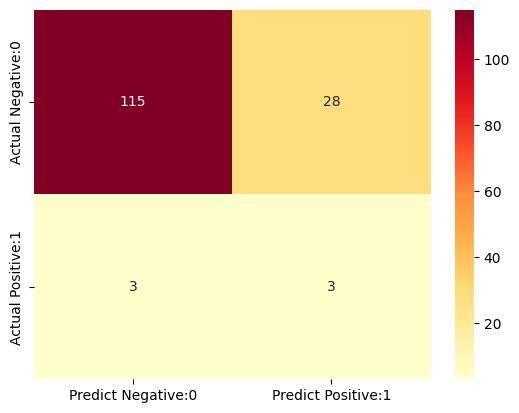

In [ ]:
cm2_matrix = pd.DataFrame(data=cm2, index=['Actual Negative:0','Actual Positive:1']
                          ,columns=['Predict Negative:0','Predict Positive:1'])
sns.heatmap(cm2_matrix, annot=True, fmt='d', cmap='YlOrRd')

## Using ADASYN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)

#ADASYN
classifier.fit(X_train3, y_train3)
#Prediction ADASYN
y_pred3= classifier.predict(X_test)
#confusion matrix
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)
print("Acurracy ",accuracy_score(y_test, y_pred3)*100)

[[116  27]
 [  2   4]]
Acurracy  80.53691275167785


In [ ]:
auc_score = roc_auc_score(y_test,y_pred3)
print("AUC Score:", auc_score)

AUC Score: 0.7389277389277389


In [ ]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89       143
           1       0.13      0.67      0.22         6

    accuracy                           0.81       149
   macro avg       0.56      0.74      0.55       149
weighted avg       0.95      0.81      0.86       149



<Axes: >

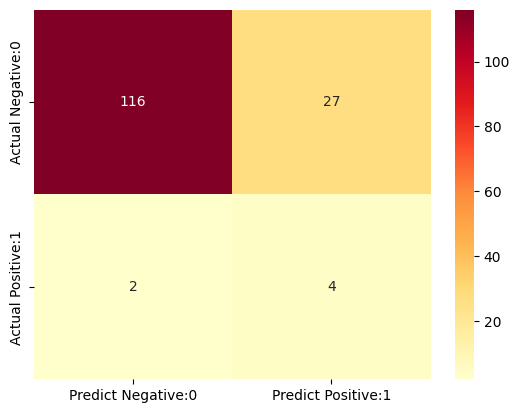

In [ ]:
cm3_matrix = pd.DataFrame(data=cm3, index=['Actual Negative:0','Actual Positive:1']
                          ,columns=['Predict Negative:0','Predict Positive:1'])

sns.heatmap(cm3_matrix, annot=True, fmt='d', cmap='YlOrRd')

## Using SMOTEENN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)
#SMOTEENN
classifier.fit(X_train4, y_train4)
#Prediction SMOTEENN
y_pred4= classifier.predict(X_test)
#confusion matrix
cm4 = confusion_matrix(y_test, y_pred4)
print(cm4)
print("Acurracy ",accuracy_score(y_test, y_pred4)*100)

[[101  42]
 [  1   5]]
Acurracy  71.14093959731544


In [ ]:
auc_score = roc_auc_score(y_test,y_pred4)
print("AUC Score:", auc_score)

AUC Score: 0.7698135198135199


In [ ]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.99      0.71      0.82       143
           1       0.11      0.83      0.19         6

    accuracy                           0.71       149
   macro avg       0.55      0.77      0.51       149
weighted avg       0.95      0.71      0.80       149



<Axes: >

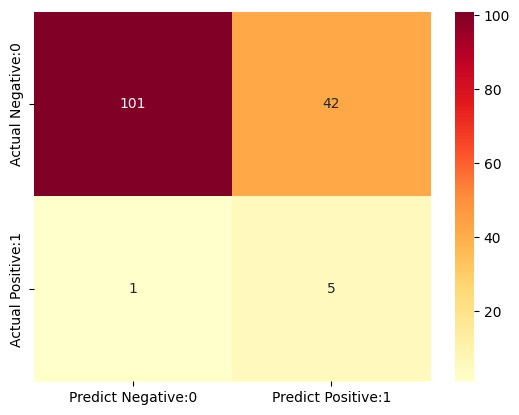

In [ ]:
cm4_matrix = pd.DataFrame(data=cm4, index=['Actual Negative:0','Actual Positive:1'],columns=['Predict Negative:0','Predict Positive:1'])
sns.heatmap(cm4_matrix, annot=True, fmt='d', cmap='YlOrRd')

# **5 Gaussian Naive Bayes**

## Using ROS

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
#ROS
classifier.fit(X_train1, y_train1)
#Prediction ROS
y_pred1= classifier.predict(X_test)
#confusion matrix
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)
print("Acurracy ",accuracy_score(y_test, y_pred1)*100)

[[85 58]
 [ 0  6]]
Acurracy  61.07382550335571


In [ ]:
auc_score = roc_auc_score(y_test,y_pred1)
print("AUC Score:", auc_score)

AUC Score: 0.7972027972027972


In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.59      0.75       143
           1       0.09      1.00      0.17         6

    accuracy                           0.61       149
   macro avg       0.55      0.80      0.46       149
weighted avg       0.96      0.61      0.72       149



<Axes: >

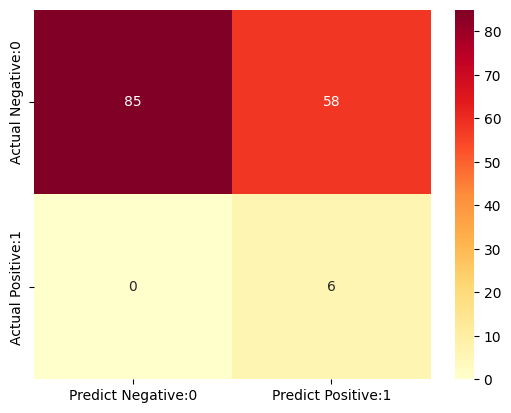

In [ ]:
cm1_matrix = pd.DataFrame(data=cm1, index=['Actual Negative:0','Actual Positive:1']
                          ,columns=['Predict Negative:0','Predict Positive:1'])
sns.heatmap(cm1_matrix, annot=True, fmt='d', cmap='YlOrRd')

## Using SMOTE

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

#SMOTE
classifier.fit(X_train2, y_train2)
#Prediction SMOTE
y_pred2= classifier.predict(X_test)
#confusion matrix SMOTE
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)

print("Acurracy ",accuracy_score(y_test, y_pred2)*100)

[[85 58]
 [ 0  6]]
Acurracy  61.07382550335571


In [ ]:
auc_score = roc_auc_score(y_test,y_pred2)
print("AUC Score:", auc_score)

AUC Score: 0.7972027972027972


In [ ]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.59      0.75       143
           1       0.09      1.00      0.17         6

    accuracy                           0.61       149
   macro avg       0.55      0.80      0.46       149
weighted avg       0.96      0.61      0.72       149



<Axes: >

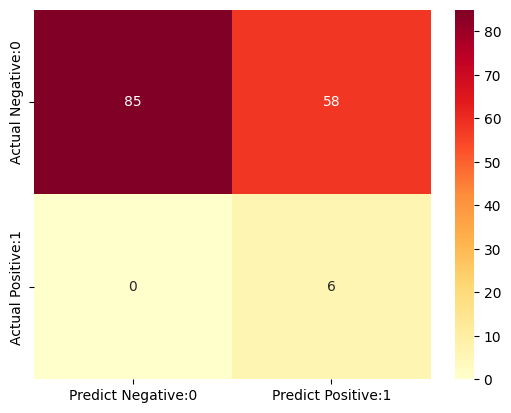

In [ ]:
cm2_matrix = pd.DataFrame(data=cm2, index=['Actual Negative:0','Actual Positive:1']
                          ,columns=['Predict Negative:0','Predict Positive:1'])
sns.heatmap(cm2_matrix, annot=True, fmt='d', cmap='YlOrRd')

## Using ADASYN

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

#ADASYN
classifier.fit(X_train3, y_train3)
#Prediction ADASYN
y_pred3= classifier.predict(X_test)
#confusion matrix
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)
print("Acurracy ",accuracy_score(y_test, y_pred3)*100)

[[81 62]
 [ 0  6]]
Acurracy  58.38926174496645


In [ ]:
auc_score = roc_auc_score(y_test,y_pred3)
print("AUC Score:", auc_score)

AUC Score: 0.7832167832167832


In [ ]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       1.00      0.57      0.72       143
           1       0.09      1.00      0.16         6

    accuracy                           0.58       149
   macro avg       0.54      0.78      0.44       149
weighted avg       0.96      0.58      0.70       149



<Axes: >

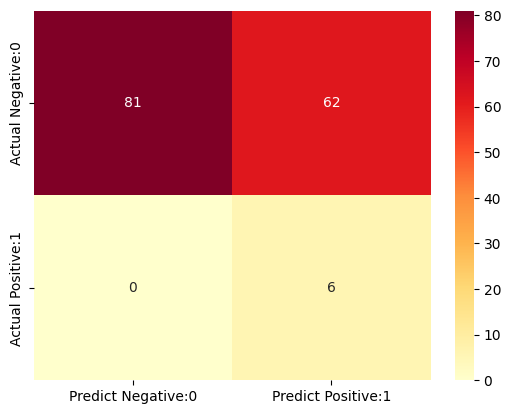

In [ ]:
cm3_matrix = pd.DataFrame(data=cm3, index=['Actual Negative:0','Actual Positive:1']
                          ,columns=['Predict Negative:0','Predict Positive:1'])

sns.heatmap(cm3_matrix, annot=True, fmt='d', cmap='YlOrRd')

## Using SMOTEENN

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

#SMOTEENN
classifier.fit(X_train4, y_train4)
#Prediction SMOTEENN
y_pred4= classifier.predict(X_test)
#confusion matrix
cm4 = confusion_matrix(y_test, y_pred4)
print(cm4)
print("Acurracy ",accuracy_score(y_test, y_pred4)*100)

[[85 58]
 [ 0  6]]
Acurracy  61.07382550335571


In [ ]:
auc_score = roc_auc_score(y_test,y_pred4)
print("AUC Score:", auc_score)

AUC Score: 0.7972027972027972


In [ ]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       1.00      0.59      0.75       143
           1       0.09      1.00      0.17         6

    accuracy                           0.61       149
   macro avg       0.55      0.80      0.46       149
weighted avg       0.96      0.61      0.72       149



<Axes: >

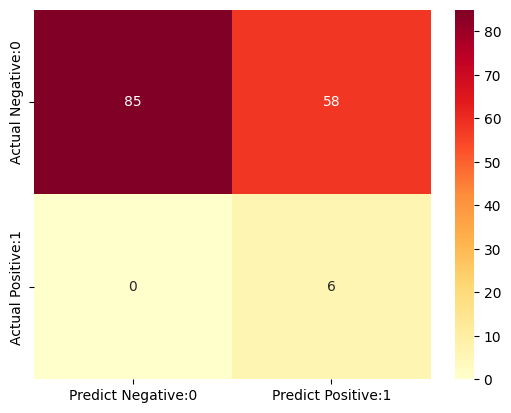

In [ ]:
cm4_matrix = pd.DataFrame(data=cm4, index=['Actual Negative:0','Actual Positive:1']
                          ,columns=['Predict Negative:0','Predict Positive:1'])
sns.heatmap(cm4_matrix, annot=True, fmt='d', cmap='YlOrRd')

# **6 Random Forest**

## Using ROS

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',
                                    random_state = 0)

#ROS
classifier.fit(X_train1, y_train1)
#Prediction ROS
y_pred1= classifier.predict(X_test)
#confusion matrix ROS
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)

print("Acurracy ",accuracy_score(y_test, y_pred1)*100)

[[134   9]
 [  5   1]]
Acurracy  90.60402684563759


In [ ]:
auc_score = roc_auc_score(y_test,y_pred1)
print("AUC Score:", auc_score)

AUC Score: 0.5518648018648019


In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       143
           1       0.10      0.17      0.12         6

    accuracy                           0.91       149
   macro avg       0.53      0.55      0.54       149
weighted avg       0.93      0.91      0.92       149



Acurracy  90.60402684563759


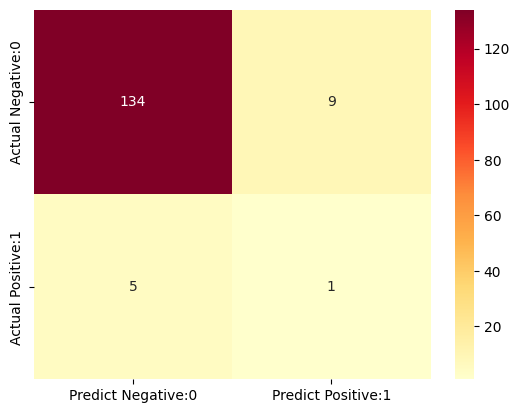

In [ ]:
cm1_matrix = pd.DataFrame(data=cm1, index=['Actual Negative:0','Actual Positive:1']
                          ,columns=['Predict Negative:0','Predict Positive:1'])
sns.heatmap(cm1_matrix, annot=True, fmt='d', cmap='YlOrRd')
print("Acurracy ",accuracy_score(y_test, y_pred1)*100)

## Using SMOTE

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',
                                    random_state = 0)

#SMOTE
classifier.fit(X_train2, y_train2)
#Prediction SMOTE
y_pred2= classifier.predict(X_test)
#confusion matrix SMOTE
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)

print("Acurracy ",accuracy_score(y_test,y_pred2)*100)

[[134   9]
 [  2   4]]
Acurracy  92.61744966442953


In [ ]:
auc_score = roc_auc_score(y_test,y_pred2)
print("AUC Score:", auc_score)

AUC Score: 0.8018648018648018


In [ ]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       143
           1       0.31      0.67      0.42         6

    accuracy                           0.93       149
   macro avg       0.65      0.80      0.69       149
weighted avg       0.96      0.93      0.94       149



<Axes: >

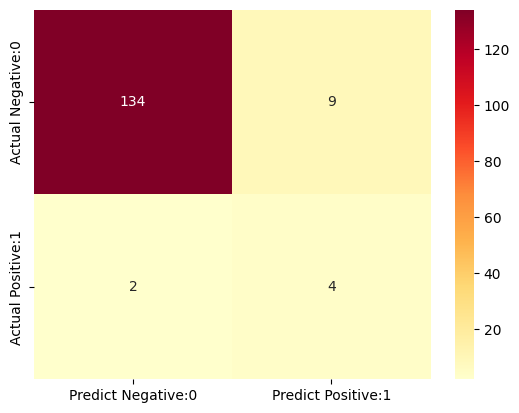

In [ ]:
cm2_matrix = pd.DataFrame(data=cm2, index=['Actual Negative:0','Actual Positive:1']
                          ,columns=['Predict Negative:0','Predict Positive:1'])
sns.heatmap(cm2_matrix, annot=True, fmt='d', cmap='YlOrRd')

## Using ADASYN

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',
                                    random_state = 0)

#ADASYN
classifier.fit(X_train3, y_train3)
#Prediction ADASYN
y_pred3= classifier.predict(X_test)
#confusion matrix
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)
print("Acurracy ",accuracy_score(y_test, y_pred3)*100)

[[131  12]
 [  1   5]]
Acurracy  91.2751677852349


In [ ]:
auc_score = roc_auc_score(y_test,y_pred3)
print("AUC Score:", auc_score)

AUC Score: 0.8747086247086248


In [ ]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       143
           1       0.29      0.83      0.43         6

    accuracy                           0.91       149
   macro avg       0.64      0.87      0.69       149
weighted avg       0.96      0.91      0.93       149



<Axes: >

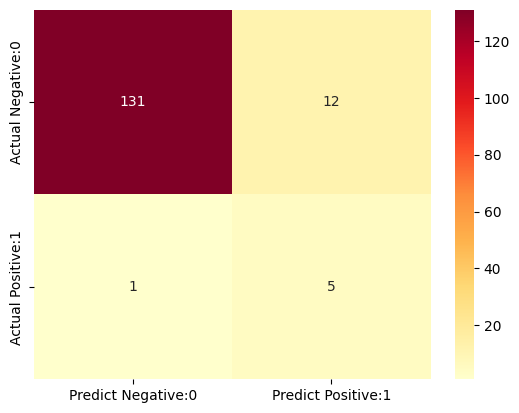

In [ ]:
cm3_matrix = pd.DataFrame(data=cm3, index=['Actual Negative:0','Actual Positive:1']
                          ,columns=['Predict Negative:0','Predict Positive:1'])

sns.heatmap(cm3_matrix, annot=True, fmt='d', cmap='YlOrRd')

## Using SMOTEENN

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy'
, random_state = 0)
#SMOTEENN
classifier.fit(X_train4, y_train4)
#Prediction SMOTEENN
y_pred4= classifier.predict(X_test)
#confusion matrix
cm4 = confusion_matrix(y_test, y_pred4)
print(cm4)
print("Acurracy ",accuracy_score(y_test, y_pred4)*100)

[[120  23]
 [  0   6]]
Acurracy  84.56375838926175


In [ ]:
auc_score = roc_auc_score(y_test,y_pred4)
print("AUC Score:", auc_score)

AUC Score: 0.9195804195804196


In [ ]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91       143
           1       0.21      1.00      0.34         6

    accuracy                           0.85       149
   macro avg       0.60      0.92      0.63       149
weighted avg       0.97      0.85      0.89       149



<Axes: >

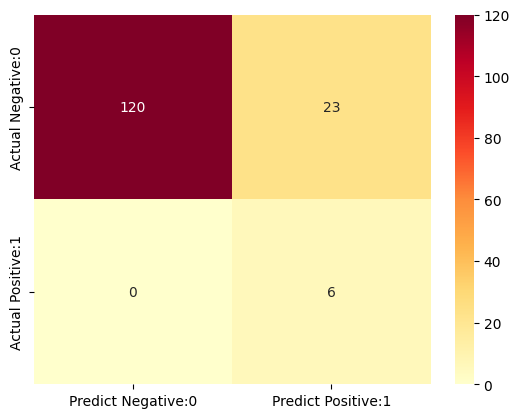

In [ ]:
cm4_matrix = pd.DataFrame(data=cm4, index=['Actual Negative:0','Actual Positive:1']
                          ,columns=['Predict Negative:0','Predict Positive:1'])
sns.heatmap(cm4_matrix, annot=True, fmt='d', cmap='YlOrRd')